<a href="https://colab.research.google.com/github/nidacp/CSC120-A2/blob/master/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Name: Nida Chacar-Palubinskas

Sources:
    https://www.geeksforgeeks.org/linear-regression-python-implementation/#
    https://www.geeksforgeeks.org/how-to-calculate-confidence-intervals-in-python/#
    https://www.geeksforgeeks.org/confidence-and-prediction-intervals-with-statsmodels/

Coding partners/TAs: n/a

Please let me know if the header or sources should be formatted differently! I couldn't spot a preferred format on the instructions.
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def part1():

  df = pd.read_csv("/content/drive/MyDrive/candy-data.csv")

  choc_error = (df["chocolate"] != df["chocolate-prediction"]).mean() #finds the percent of times actual != predicted
  win_error = (df["winpercent"] - df["win-prediction"]).abs().mean() #same concept, but this can be negative so we need the absolute value

  print("Chocolate error rate: ", choc_error)
  print("Win error rate: ", win_error)

In [ ]:
part1()

Chocolate error rate:  0.5176470588235295
Win error rate:  49.853749694117646


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/auto-mpg.csv")
df2 = df2.dropna()

In [ ]:
def part2():
    #mpg as the response and horsepower as the predictor
    df2["horsepower"] = pd.to_numeric(df2["horsepower"], errors='coerce')  #cleaning up to not get errors about horsepower values being strings


    n = np.size(df2["horsepower"])

    x_mean =  np.mean(df2["horsepower"])
    y_mean = np.mean(df2["mpg"])

    xy = np.sum(df2["horsepower"] * df2["mpg"]) - n*y_mean*x_mean
    xx = np.sum(df2["horsepower"] * df2["horsepower"]) - n*x_mean*x_mean

    b_1 = xy/xx
    b_0 = y_mean - b_1*x_mean

    print("b_0 is ", b_0, " and b_1 is ", b_1)

    plotting(b_0, b_1)

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_smooth
import plotnine as p9
import scipy.stats as st

def plotting(b_0, b_1):
  plt.scatter(df2["horsepower"], df2["mpg"])

  y_pred = b_0 + b_1*df2["horsepower"]

  plt.plot(df2["horsepower"], y_pred, color = "red")

  plt.show()

b_0 is  45.674582741151056  and b_1 is  -0.21211964914331757


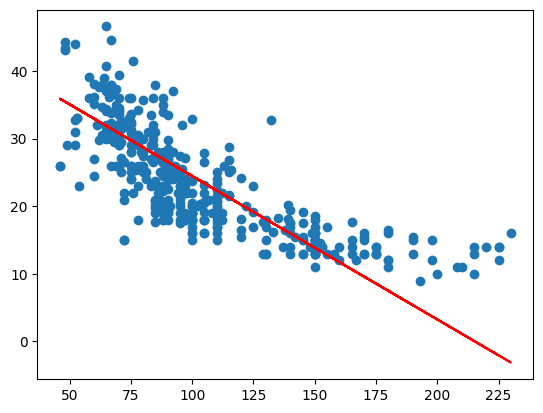

In [ ]:
part2()

In [ ]:
from scipy import stats

def calc_confidence(data, conf=0.95):
  mean = np.mean(data)
  se = stats.sem(data)
  freedom = len(data) - 1
  t_crit = stats.t.ppf((1 + conf) / 2, freedom)
  me = t_crit * se
  conf_int = (mean - me, mean + me)

  return conf_int

In [ ]:
def calc_prediction(data, conf=0.95):
  mean = np.mean(data)
  s = np.std(data, ddof=1)
  freedom = len(data) - 1
  t_crit = stats.t.ppf((1 + conf) / 2, freedom)
  me = t_crit * s * np.sqrt(1 + 1/len(data))
  pred_int = (mean - me, mean + me)
  return pred_int

In [ ]:
print(calc_confidence(df2["mpg"]))
print(calc_prediction(df2["mpg"]))

mean:  23.514572864321607  me:  0.770222590265507
(22.7443502740561, 24.284795454587115)
(8.129388673563033, 38.89975705508018)
